🎯Relationship Conflict Resolution Suggestion Model

The Relationship Conflict Resolution Suggestion model helps individuals find effective ways to resolve conflicts by analyzing real-life relationship problems. The model uses machine learning to understand the nature of relationship conflicts and provides advanced suggestions tailored to specific issues such as communication barriers, emotional neglect, trust problems, and differing life goals.

# 1. Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

# 2. Import Datasets and Understand Data

In [2]:
# Load the dataset
df = pd.read_csv('Relationship_Dataset.csv')

# Preview the data
df.head()

# Check for null values
df.isnull().sum()

# Check the data types and shape
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   problem              275 non-null    object
 1   keywords             275 non-null    object
 2   advanced_suggestion  275 non-null    object
dtypes: object(3)
memory usage: 6.6+ KB


(275, 3)

# 3. Exploratory Data Analysis (EDA)

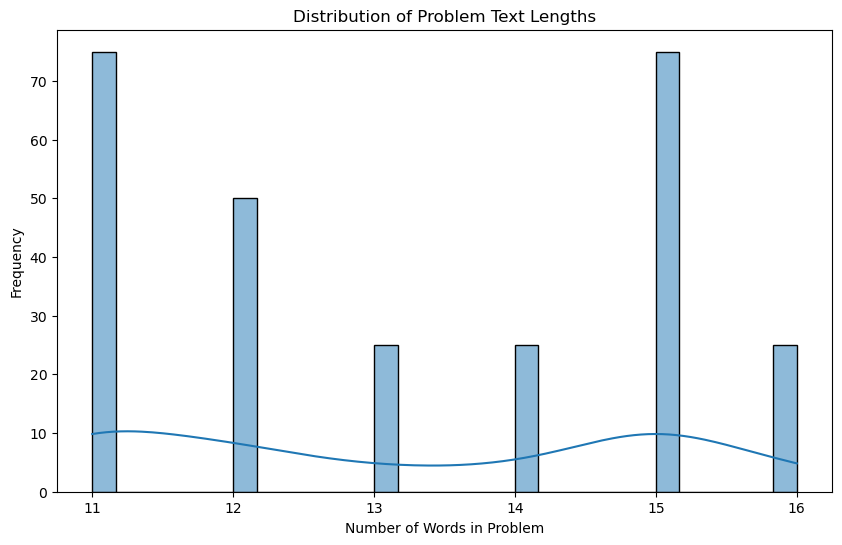

In [3]:
# Plot the distribution of text lengths in 'problem' field
df['problem_length'] = df['problem'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(df['problem_length'], kde=True, bins=30)
plt.title('Distribution of Problem Text Lengths')
plt.xlabel('Number of Words in Problem')
plt.ylabel('Frequency')
plt.show()

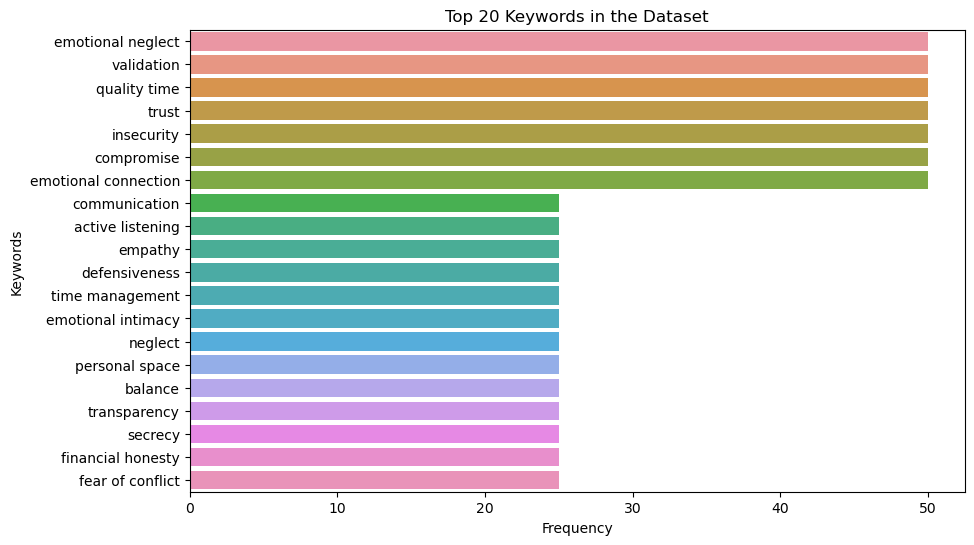

In [4]:
# Visualize the frequency of keywords in the 'keywords' column
from collections import Counter

keywords = ', '.join(df['keywords'].tolist()).split(', ')
keyword_counts = Counter(keywords)
top_keywords = keyword_counts.most_common(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=[keyword[1] for keyword in top_keywords], y=[keyword[0] for keyword in top_keywords])
plt.title('Top 20 Keywords in the Dataset')
plt.xlabel('Frequency')
plt.ylabel('Keywords')
plt.show()

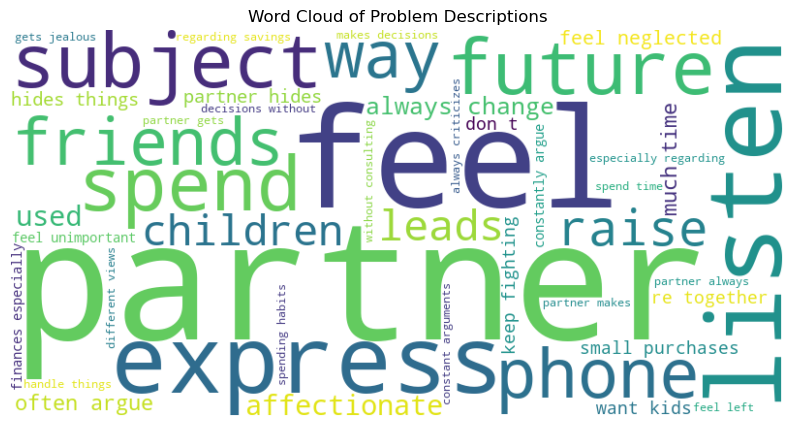

In [5]:
from wordcloud import WordCloud

# Generate word cloud for 'problem' column
problem_text = ' '.join(df['problem'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(problem_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Problem Descriptions')
plt.show()

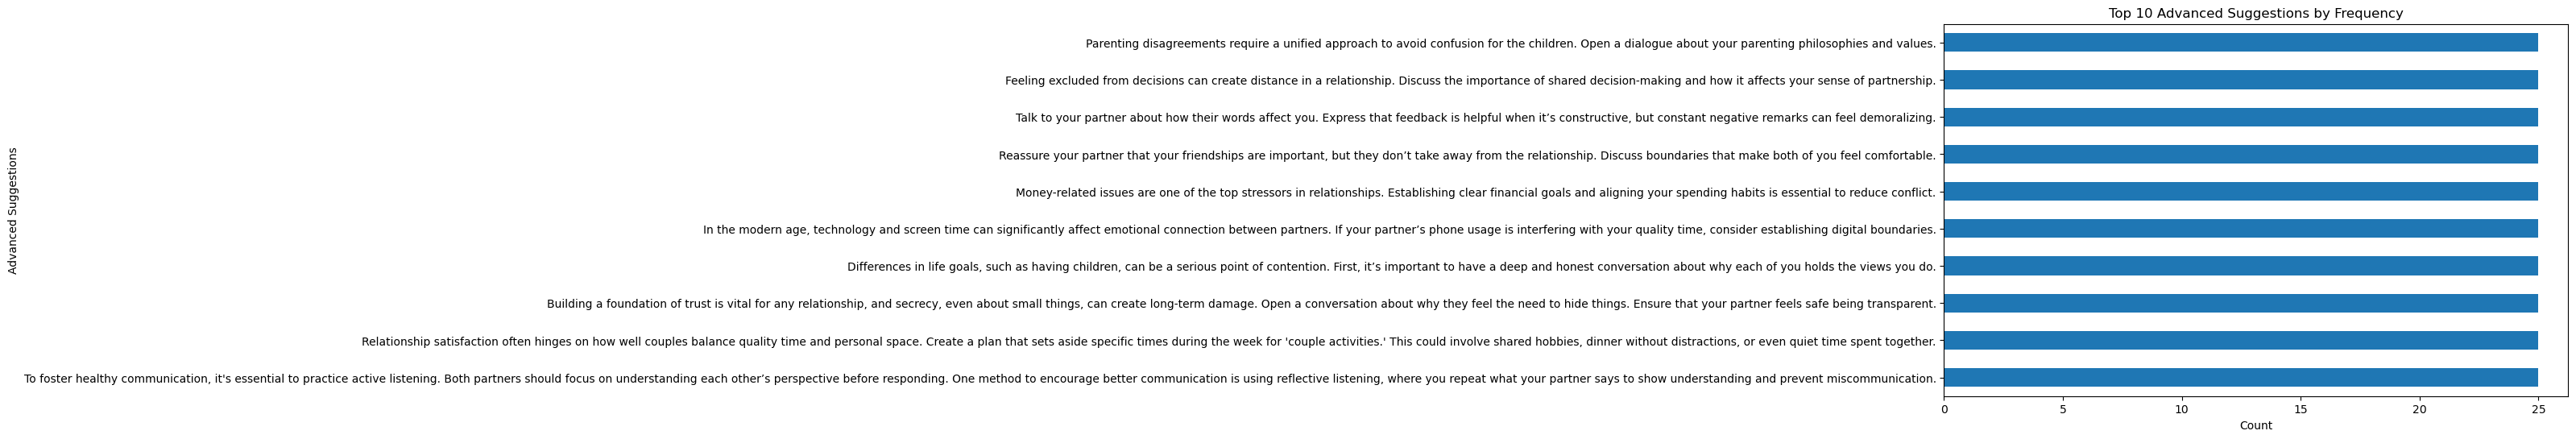

In [6]:
# Count of unique suggestions
plt.figure(figsize=(10, 6))
df['advanced_suggestion'].value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 Advanced Suggestions by Frequency')
plt.xlabel('Count')
plt.ylabel('Advanced Suggestions')
plt.show()

# 4. Data Processing

In [8]:
# Define X (features) and y (target)
X = df['problem']  # Features (problem descriptions)
y = df['advanced_suggestion']  # Target (suggestions)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(stop_words='english')

# Transform the training and testing data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# 5. Model Creation and Evaluation

Accuracy: 100.00%
                                                                                                                                                                                                                                                                                                                                               precision    recall  f1-score   support

                                                                                     Building a foundation of trust is vital for any relationship, and secrecy, even about small things, can create long-term damage. Open a conversation about why they feel the need to hide things. Ensure that your partner feels safe being transparent.       1.00      1.00      1.00         6
                                                                                                                                         Differences in life goals, such as having children, can be a serious point of contention. Firs

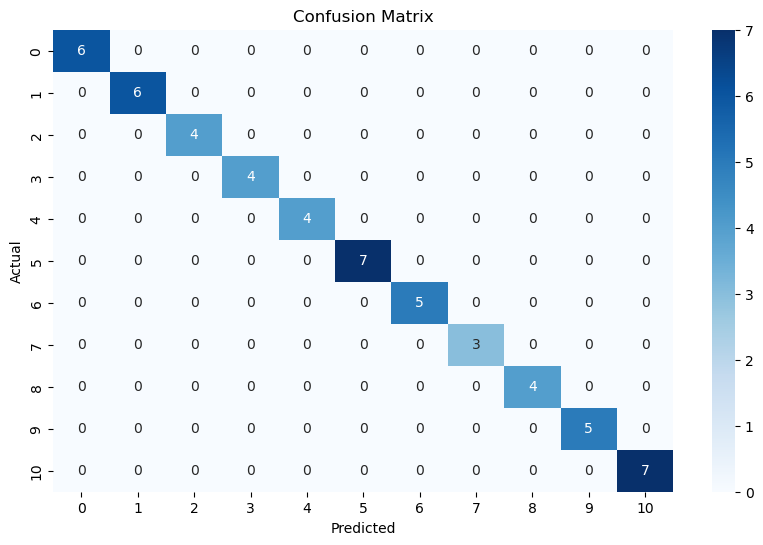

In [9]:
# Create a RandomForestClassifier model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [10]:
# 6. Hyperparameter Tuning

In [11]:
# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_tfidf, y_train)

# Best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate the tuned model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test_tfidf)

# Accuracy after tuning
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
print(f'Tuned Accuracy: {tuned_accuracy * 100:.2f}%')

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Accuracy: 100.00%


# 7. Pickle File Creation

In [12]:
# Save the model
with open('relationship_advice_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

# Save the vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf, file)

# 8. Sample Data Checking

In [14]:
# Load the model and vectorizer
with open('relationship_advice_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

with open('tfidf_vectorizer.pkl', 'rb') as file:
    loaded_vectorizer = pickle.load(file)

# Sample problem
sample_problem = ["My partner always interrupts me during conversations, and I feel disrespected."]

# Transform and predict
sample_tfidf = loaded_vectorizer.transform(sample_problem)
prediction = loaded_model.predict(sample_tfidf)

print(f"Predicted Suggestion: {prediction[0]}")

Predicted Suggestion: In the modern age, technology and screen time can significantly affect emotional connection between partners. If your partner’s phone usage is interfering with your quality time, consider establishing digital boundaries.
